# WFPT DM valid actuator selection
Notebook that demos the wfpt_dm_act_selection class.

Developed by: Fernando Quiros-Pacheco

Last update: 05/08/2023

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from ceo import wfpt_visulib, wfpt_dm_act_selection, wfpt_utilities

## Show actuator numbering

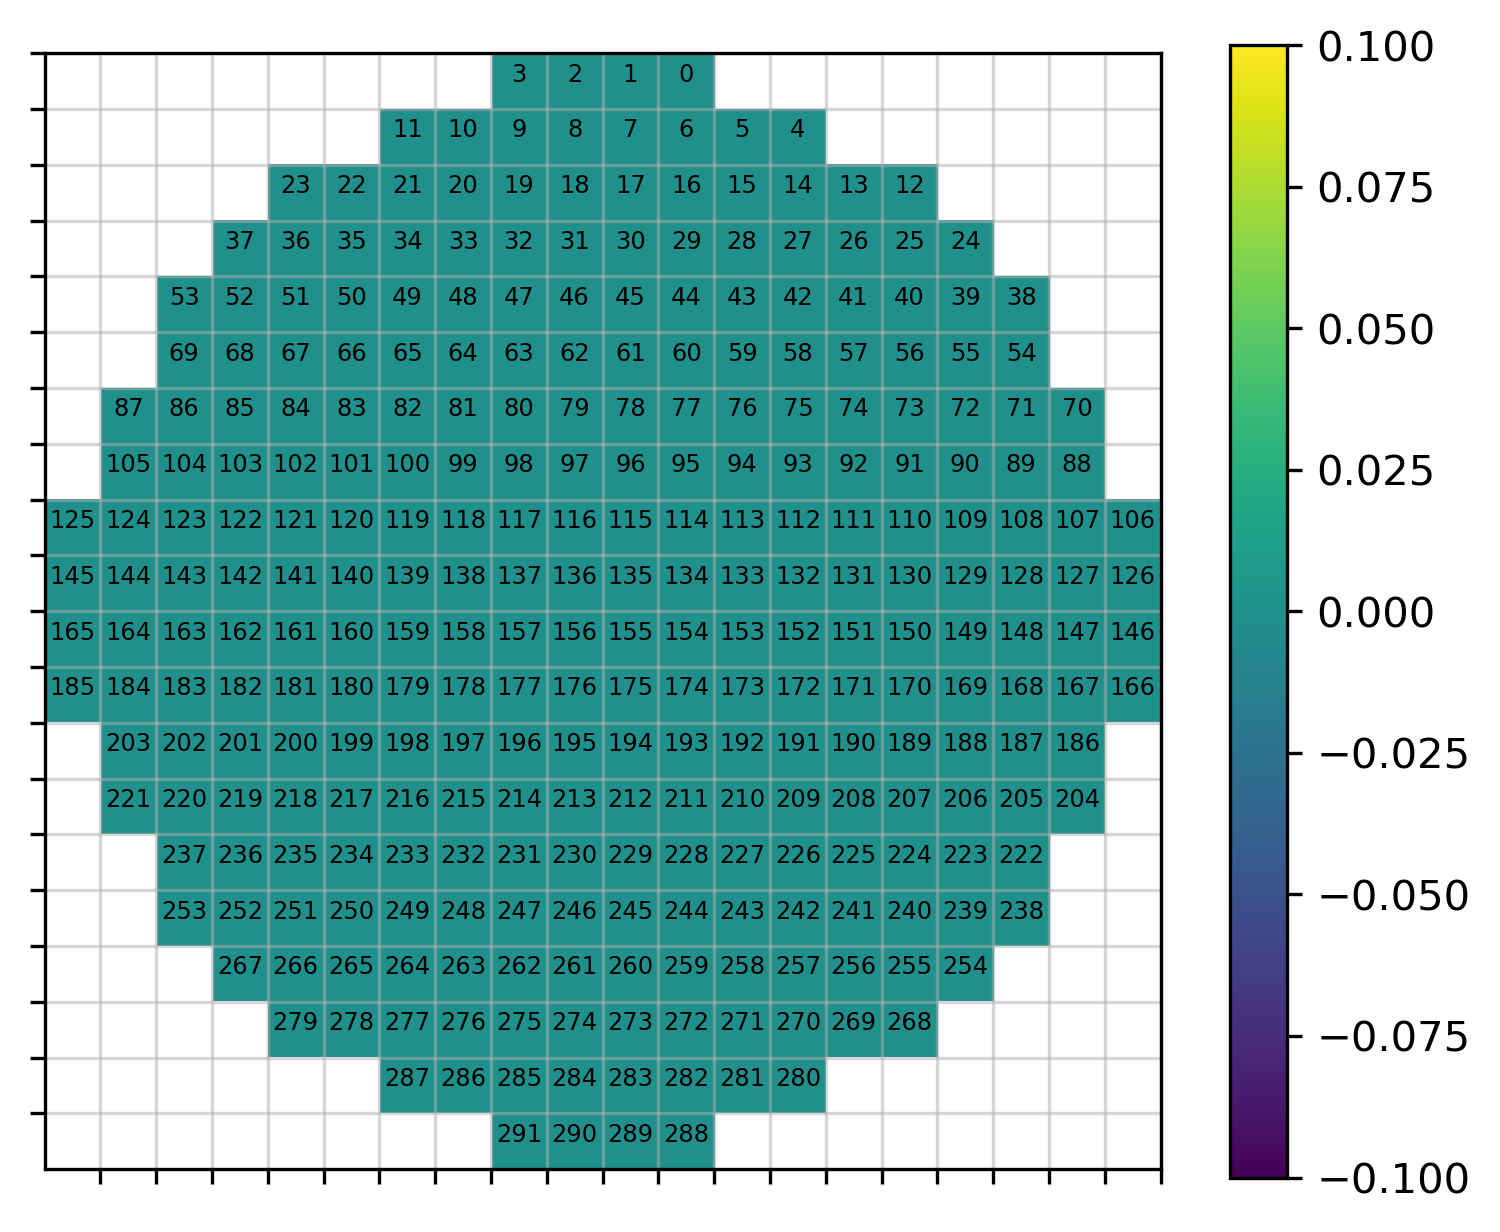

In [3]:
actmap = wfpt_visulib.dm292_actmap()
actcoord = np.argwhere(actmap)

fig, ax = plt.subplots()
fig.set_size_inches((6,5))
fig.dpi=300
wfpt_visulib.show_dm292(np.zeros(292), fig=fig, ax=ax)
for jj in range(292):
    ax.text(actcoord[jj,1], actcoord[jj,0], str(jj), fontsize='xx-small',
           horizontalalignment='center')

## Selection based on simulated DM influence functions

In [8]:
nPx = 833
M2_baffle = 0.0
project_truss_onaxis = False
ifmat_file = wfpt_utilities.influence_matrix_filename('M1_DM', nPx, M2_baffle, project_truss_onaxis )

In [9]:
dms = wfpt_dm_act_selection(ifmat_file, 'IFpeaks')

Restoring IF peaks from file /home/ubuntu/CEO/python/ceo/wfpt/WFPT_model_data/influence_matrices/M1_DM_IFmat_nPx833_M2baffle0.0m_woTruss.npz


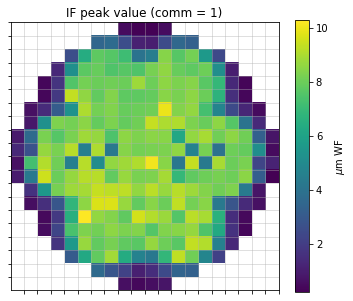

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches((6,5))
#fig.dpi=300
wfpt_visulib.show_dm292(dms.IFpeaks*1e6, fig=fig, ax=ax, title='IF peak value (comm = 1)',
                       clb_label='$\mu$m WF')

### Initial selection based on thresholding

With a threshold of 0.380 you get 215 valid actuators.


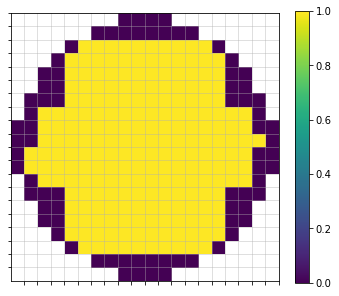

In [15]:
thr = 0.38
dms.selection_with_threshold(thr)

wfpt_visulib.show_dm292(dms.valid_acts)

### Removal and addition of actuators

Number of valid actuators: 214


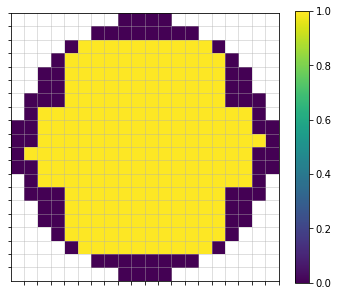

In [17]:
remove_act_list = [184]
#add_act_list = [127,147,144,164] # pair of actuators at edges of S1 and S4.
add_act_list = []
dms.selection_with_actuator_index(remove_act_list, add_act_list)

wfpt_visulib.show_dm292(dms.valid_acts)

### Actuator slaving selection

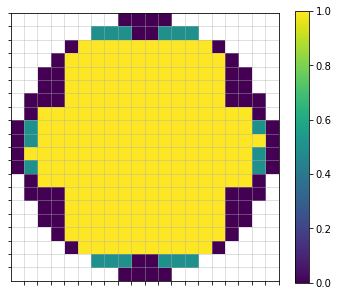

In [22]:
act_masters = [14,15,16,19,20,21,270,271,272,275,276,277, 148,143,183,123,108,168]
act_slaves  = [ 4, 5, 6, 9,10,11,280,281,282,285,286,287, 147,144,184,124,107,167]
dms.slaving_selection(act_masters, act_slaves)

valid_acts = dms.valid_acts.astype('float')
valid_acts[dms.act_slaves] = 0.5
wfpt_visulib.show_dm292(valid_acts)

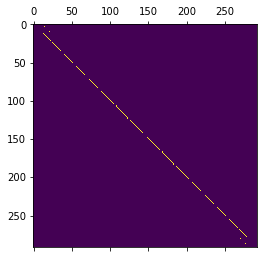

In [23]:
plt.matshow(dms.slaveMat)

### Save selection in dedicated folder